Import data set

In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
import pandas as pd
import numpy as np

In [2]:
spark

In [3]:
from pyspark.sql.functions import *

In [4]:
df = spark.read.option("delimiter", ",").csv("train.csv", header=True, inferSchema = True)

In [5]:
df.dtypes

[('Id', 'int'),
 ('MSSubClass', 'int'),
 ('MSZoning', 'string'),
 ('LotFrontage', 'string'),
 ('LotArea', 'int'),
 ('Street', 'string'),
 ('Alley', 'string'),
 ('LotShape', 'string'),
 ('LandContour', 'string'),
 ('Utilities', 'string'),
 ('LotConfig', 'string'),
 ('LandSlope', 'string'),
 ('Neighborhood', 'string'),
 ('Condition1', 'string'),
 ('Condition2', 'string'),
 ('BldgType', 'string'),
 ('HouseStyle', 'string'),
 ('OverallQual', 'int'),
 ('OverallCond', 'int'),
 ('YearBuilt', 'int'),
 ('YearRemodAdd', 'int'),
 ('RoofStyle', 'string'),
 ('RoofMatl', 'string'),
 ('Exterior1st', 'string'),
 ('Exterior2nd', 'string'),
 ('MasVnrType', 'string'),
 ('MasVnrArea', 'string'),
 ('ExterQual', 'string'),
 ('ExterCond', 'string'),
 ('Foundation', 'string'),
 ('BsmtQual', 'string'),
 ('BsmtCond', 'string'),
 ('BsmtExposure', 'string'),
 ('BsmtFinType1', 'string'),
 ('BsmtFinSF1', 'int'),
 ('BsmtFinType2', 'string'),
 ('BsmtFinSF2', 'int'),
 ('BsmtUnfSF', 'int'),
 ('TotalBsmtSF', 'int'),
 ('

In [6]:
df.limit(5).toPandas() # easy to visualise

Id  MSSubClass MSZoning LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL          65     8450   Pave    NA      Reg   
1   2          20       RL          80     9600   Pave    NA      Reg   
2   3          60       RL          68    11250   Pave    NA      IR1   
3   4          70       RL          60     9550   Pave    NA      IR1   
4   5          60       RL          84    14260   Pave    NA      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
1         Lvl    AllPub  ...        0     NA    NA          NA       0      5   
2         Lvl    AllPub  ...        0     NA    NA          NA       0      9   
3         Lvl    AllPub  ...        0     NA    NA          NA       0      2   
4         Lvl    AllPub  ...        0     NA    NA          NA       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
for i in df.dtypes:
    if i[1]=='string':
        print(df.groupBy(i[0]).count().orderBy('count', ascending=False).toPandas())

  MSZoning  count
0       RL   1151
1       RM    218
2       FV     65
3       RH     16
4  C (all)     10
    LotFrontage  count
0            NA    259
1            60    143
2            70     70
3            80     69
4            50     57
..          ...    ...
106         152      1
107         149      1
108          39      1
109         182      1
110         137      1

[111 rows x 2 columns]
  Street  count
0   Pave   1454
1   Grvl      6
  Alley  count
0    NA   1369
1  Grvl     50
2  Pave     41
  LotShape  count
0      Reg    925
1      IR1    484
2      IR2     41
3      IR3     10
  LandContour  count
0         Lvl   1311
1         Bnk     63
2         HLS     50
3         Low     36
  Utilities  count
0    AllPub   1459
1    NoSeWa      1
  LotConfig  count
0    Inside   1052
1    Corner    263
2   CulDSac     94
3       FR2     47
4       FR3      4
  LandSlope  count
0       Gtl   1382
1       Mod     65
2       Sev     13
   Neighborhood  count
0         NAmes    

In [8]:
data = df.toPandas()

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int32 
 1   MSSubClass     1460 non-null   int32 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int32 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int32 
 18  OverallCond    1460 non-null

In [10]:
primary_key = 'Id'

In [11]:
anonymize_fields={'Street': 'street_name','Alley':'street_suffix' }

In [12]:
from sdv.tabular import CTGAN

model = CTGAN(cuda = True, verbose = True ,epochs=500,batch_size=100,generator_dim=(256, 256, 256),discriminator_dim=(256, 256, 256),primary_key =primary_key,anonymize_fields = anonymize_fields)
model.fit(data)

/home/ilan/.local/lib/python3.6/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
/home/ilan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/sk

/home/ilan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/ilan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments wi

Epoch 1, Loss G:  1.8935,Loss D: -1.3963
Epoch 2, Loss G:  1.0345,Loss D: -2.1836
Epoch 3, Loss G: -1.3938,Loss D: -0.4549
Epoch 4, Loss G: -0.5218,Loss D: -0.1788
Epoch 5, Loss G:  0.1014,Loss D: -0.5105
Epoch 6, Loss G: -0.4238,Loss D:  0.0939
Epoch 7, Loss G: -0.0681,Loss D:  0.2960
Epoch 8, Loss G:  0.0582,Loss D:  0.1017
Epoch 9, Loss G: -0.4503,Loss D:  0.3073
Epoch 10, Loss G: -0.0786,Loss D:  0.3140
Epoch 11, Loss G:  0.3483,Loss D:  0.1596
Epoch 12, Loss G:  0.0676,Loss D:  0.1187
Epoch 13, Loss G: -0.6578,Loss D: -0.6560
Epoch 14, Loss G:  0.4563,Loss D: -0.3428
Epoch 15, Loss G: -0.8134,Loss D:  0.9563
Epoch 16, Loss G:  0.0031,Loss D:  0.5197
Epoch 17, Loss G:  0.3190,Loss D:  1.2976
Epoch 18, Loss G:  0.8595,Loss D: -0.2153
Epoch 19, Loss G: -0.1375,Loss D:  1.0136
Epoch 20, Loss G:  0.9981,Loss D:  0.4939
Epoch 21, Loss G:  0.0386,Loss D: -0.0236
Epoch 22, Loss G: -0.6630,Loss D: -0.3631
Epoch 23, Loss G:  1.2182,Loss D:  0.4424
Epoch 24, Loss G: -1.0256,Loss D:  0.3341
E

Epoch 195, Loss G: -3.9988,Loss D: -2.3359
Epoch 196, Loss G: -2.5244,Loss D: -1.7014
Epoch 197, Loss G: -5.3447,Loss D: -0.8585
Epoch 198, Loss G: -4.8054,Loss D:  0.5343
Epoch 199, Loss G: -5.5074,Loss D: -0.9853
Epoch 200, Loss G: -5.8059,Loss D: -0.2833
Epoch 201, Loss G: -4.5241,Loss D:  0.2056
Epoch 202, Loss G: -6.7264,Loss D:  0.8742
Epoch 203, Loss G: -6.1043,Loss D: -0.3731
Epoch 204, Loss G: -2.9562,Loss D:  0.2810
Epoch 205, Loss G: -2.7562,Loss D:  1.8155
Epoch 206, Loss G: -4.4137,Loss D: -1.4115
Epoch 207, Loss G: -4.9626,Loss D:  3.1410
Epoch 208, Loss G: -4.9085,Loss D:  1.6055
Epoch 209, Loss G: -4.9086,Loss D:  0.5301
Epoch 210, Loss G: -4.7738,Loss D:  1.9272
Epoch 211, Loss G: -3.9221,Loss D: -1.5710
Epoch 212, Loss G: -4.1657,Loss D: -0.3230
Epoch 213, Loss G: -4.7385,Loss D: -1.6035
Epoch 214, Loss G: -4.7093,Loss D:  1.0831
Epoch 215, Loss G: -5.3818,Loss D: -1.6524
Epoch 216, Loss G: -3.1816,Loss D:  1.0802
Epoch 217, Loss G: -3.3202,Loss D:  0.6777
Epoch 218, 

Epoch 386, Loss G: -3.0648,Loss D: -2.1836
Epoch 387, Loss G: -0.6640,Loss D:  0.1696
Epoch 388, Loss G: -1.3044,Loss D: -0.6531
Epoch 389, Loss G: -3.0381,Loss D: -0.2117
Epoch 390, Loss G: -2.1975,Loss D:  1.3877
Epoch 391, Loss G: -2.9122,Loss D: -0.5117
Epoch 392, Loss G: -3.4112,Loss D:  0.5696
Epoch 393, Loss G: -1.9653,Loss D: -1.2906
Epoch 394, Loss G: -3.4567,Loss D: -1.8131
Epoch 395, Loss G: -2.6406,Loss D: -1.6108
Epoch 396, Loss G: -2.3584,Loss D: -1.2792
Epoch 397, Loss G: -2.0910,Loss D: -1.2605
Epoch 398, Loss G: -2.6183,Loss D: -1.2429
Epoch 399, Loss G: -2.2850,Loss D:  0.2351
Epoch 400, Loss G: -4.4151,Loss D:  0.3677
Epoch 401, Loss G: -1.6375,Loss D: -3.0307
Epoch 402, Loss G: -0.5143,Loss D:  0.4714
Epoch 403, Loss G:  0.8234,Loss D:  0.1958
Epoch 404, Loss G:  0.3725,Loss D: -0.0468
Epoch 405, Loss G: -2.0821,Loss D:  1.8307
Epoch 406, Loss G: -2.5412,Loss D: -0.8981
Epoch 407, Loss G: -1.5626,Loss D: -0.4025
Epoch 408, Loss G: -2.9244,Loss D: -0.3181
Epoch 409, 

In [13]:
syn_data = model.sample(1460)
syn_data.head(20)

Id  MSSubClass MSZoning LotFrontage  LotArea             Street  \
0    0          26       RL          NA     4253       George Brook   
1    1          29       RL          70     4856         Nicole Way   
2    2         201       RL          91     7029    Acevedo Mission   
3    3         223       RL          60     3238         Kelly Pike   
4    4         103       RL          60     7059       Taylor Curve   
5    5          51  C (all)         110    11372  Valenzuela Island   
6    6          28       RL          74     5368        Joseph Port   
7    7          94       RL          62     6662        Dillon Burg   
8    8          93       RH          59      277        Jason Inlet   
9    9         114       RL          80     3458      Jones Streets   
10  10          58       RL         100     6989         Brown Road   
11  11          98       RL          70     6883       Allen Hollow   
12  12          55       RL          78    32268      Ronald Plains   
13  13          69       RL          70     6919     Gonzalez Falls   
14  14          26       RL          NA     4218          Cook Burg   
15  15         237       RL          60     2663   Scott Expressway   
16  16          23       RM          64     3163    Alexandra Inlet   
17  17          52       RL          56     6825       Amanda Ridge   
18  18          28       RL          70     2508    Robert Turnpike   
19  19         103       RM          60     8740        Perez Shore   

         Alley LotShape LandContour Utilities  ... PoolArea PoolQC  Fence  \
0    Extension      IR1         Lvl    AllPub  ...        2     NA  MnPrv   
1       Island      Reg         Lvl    AllPub  ...        3     NA     NA   
2          Way      IR1         Lvl    AllPub  ...        0     NA  GdPrv   
3         Mall      IR1         Lvl    AllPub  ...        2     NA     NA   
4        Inlet      Reg         Lvl    AllPub  ...        2     NA     NA   
5       Plains      Reg         Bnk    AllPub  ...        2     NA  MnPrv   
6     Mountain      IR1         Lvl    AllPub  ...        2     NA   GdWo   
7       Groves      Reg         Bnk    AllPub  ...        1     NA     NA   
8         Burg      Reg         Lvl    AllPub  ...        2     NA     NA   
9         Road      IR1         Lvl    AllPub  ...        3     NA     NA   
10        Fork      IR2         Lvl    AllPub  ...        0     NA  GdPrv   
11     Highway      IR1         Lvl    AllPub  ...        2     NA     NA   
12        Loop      Reg         Lvl    AllPub  ...        0     NA     NA   
13  Trafficway      IR1         Lvl    AllPub  ...        2     NA     NA   
14        Fort      IR1         Lvl    AllPub  ...        3     NA     NA   
15      Forges      Reg         Lvl    AllPub  ...        1     NA     NA   
16       Ports      IR1         Lvl    AllPub  ...        0     NA     NA   
17  Expressway      Reg         Lvl    AllPub  ...        1     NA     NA   
18        Glen      Reg         Lvl    AllPub  ...        0     NA     NA   
19       Field      Reg         Lvl    AllPub  ...        1     NA     NA   

   MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0           NA      30      8   2008        WD         Normal      65566  
1           NA      51      6   2008        WD         Normal      33925  
2         Shed      34      3   2007        WD         Normal      57578  
3           NA      22      7   2008        WD         Normal      42137  
4           NA      43      9   2008       COD         Normal      41350  
5           NA      12     11   2008       COD        Partial     150404  
6           NA      39      3   2005        WD         Normal      15340  
7           NA      34      4   2008     ConLD         Alloca     233193  
8           NA      21     11   2009        WD         Normal     135842  
9           NA      48      7   2008        WD         Normal      77295  
10          NA     708     10   2007       COD        Abnorml     159

(1460, 81) (1460, 81)


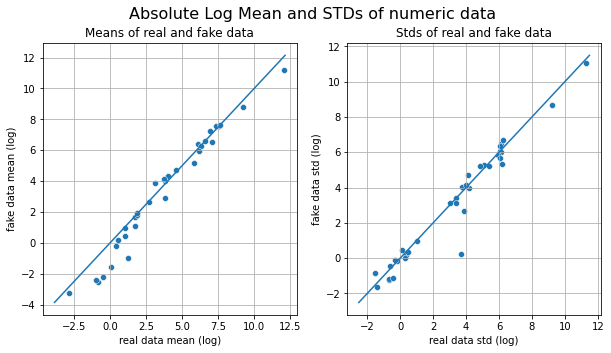

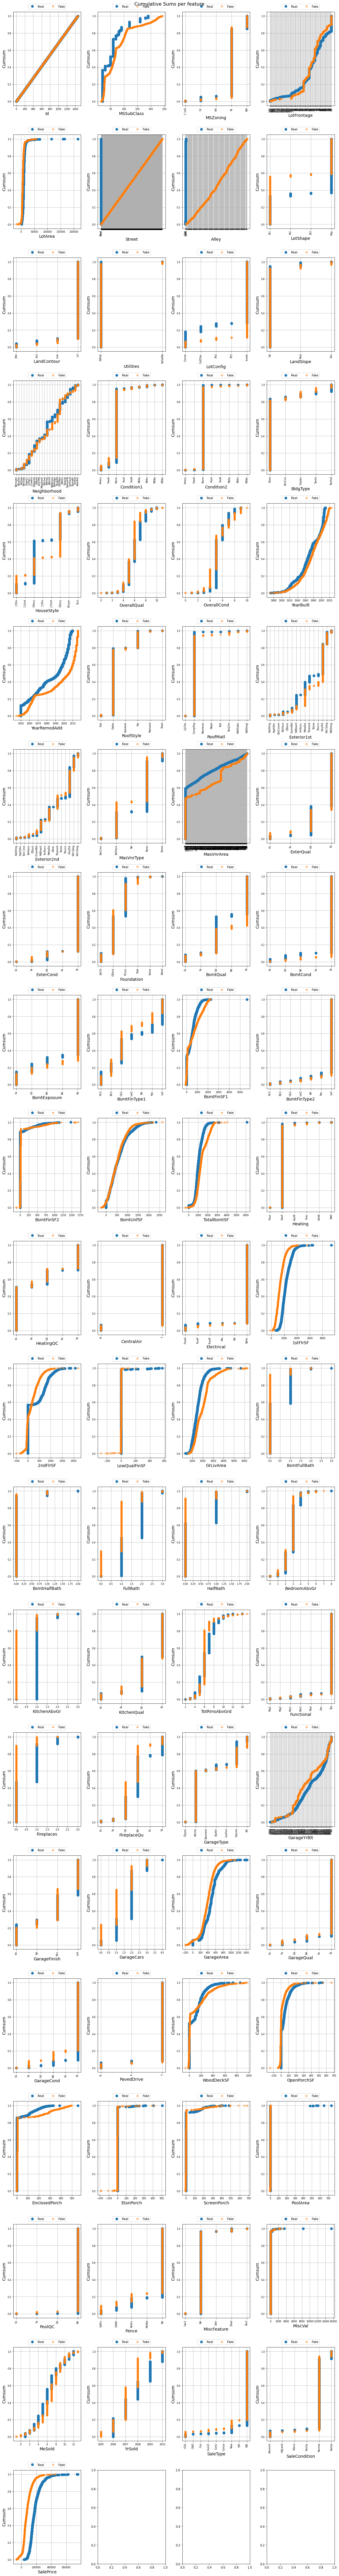

/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

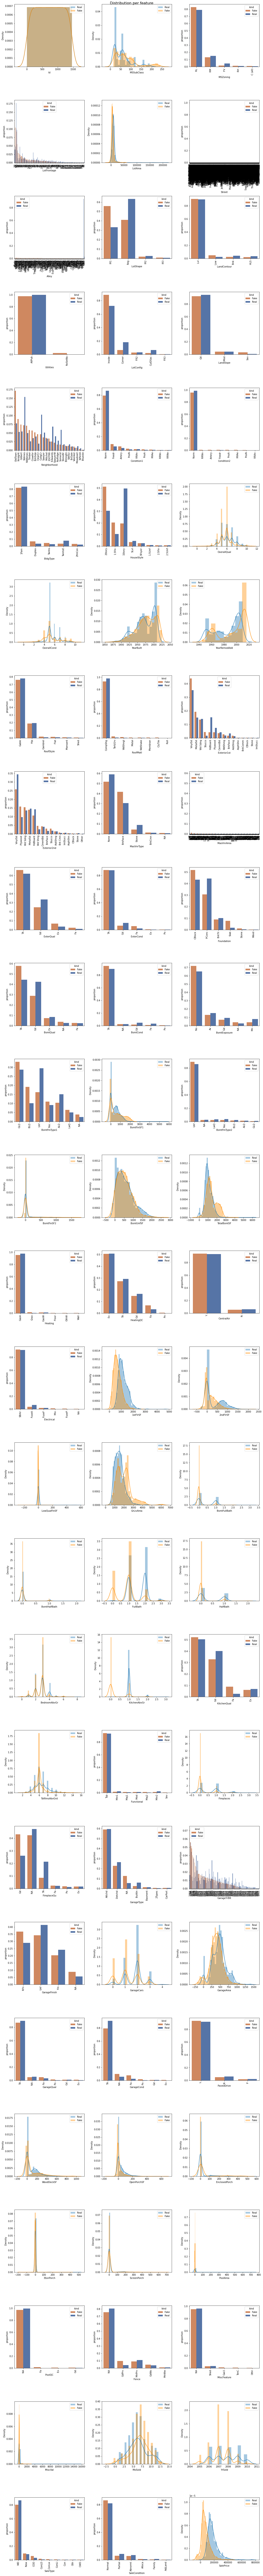

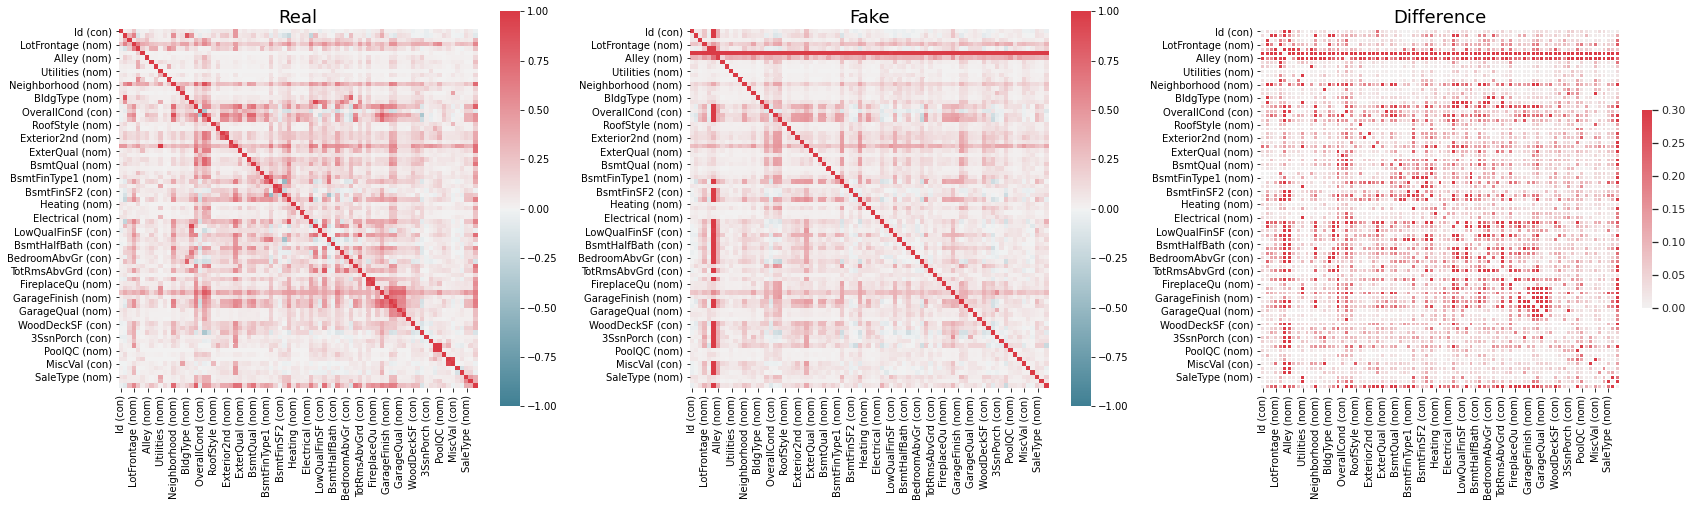

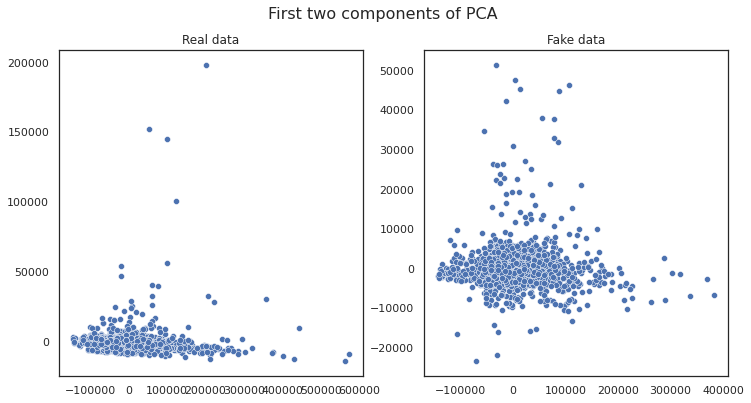

In [14]:
from table_evaluator import load_data, TableEvaluator

print(data.shape, syn_data.shape)
table_evaluator =  TableEvaluator(data, syn_data)

table_evaluator.visual_evaluation()

Label all rows of synthetic as synthetic and real as real, add syn and real then shuffle all rows. Train a logistic regression model to classify real and synthetic.

In [15]:
from sdv.evaluation import evaluate

evaluate(syn_data.drop(['Street','Alley','Id'],axis = 1), data.drop(['Street','Alley','Id'],axis = 1), metrics=['CSTest', 'KSTest'], aggregate=False)

metric                                     name  raw_score  \
0  CSTest                              Chi-Squared   0.982463   
1  KSTest  Inverted Kolmogorov-Smirnov D statistic   0.593695   

   normalized_score  min_value  max_value      goal  
0          0.982463        0.0        1.0  MAXIMIZE  
1          0.593695        0.0        1.0  MAXIMIZE

In [16]:
from sdv.metrics.tabular import MulticlassDecisionTreeClassifier

MulticlassDecisionTreeClassifier.compute(data, syn_data, target='GarageFinish')

0.3479356714594768

In [17]:
train = data.sample(int(len(data) * 0.75))

test = data[~data.index.isin(train.index)]

MulticlassDecisionTreeClassifier.compute(test, train, target='GarageFinish')


0.7224734834373523

In [18]:
syn_data1 = model.sample(14600) # 100 times more

In [19]:
syn_data1.shape

(14600, 81)

In [20]:
from sdv.tabular import TVAE

model1 = TVAE(primary_key =primary_key,anonymize_fields = anonymize_fields,epochs=500,compress_dims=(256, 256, 256),decompress_dims=(256, 256, 256),cuda = True)
model1.fit(data)

/home/ilan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/sklearn/mixture/_base.py:269: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)
/home/ilan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional argum

/home/ilan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/home/ilan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments wi

In [21]:
syn_data1 = model1.sample(1460)
syn_data1.head(20)

Id  MSSubClass MSZoning LotFrontage  LotArea            Street     Alley  \
0    0          79       RM          60     5840      Michael Port     River   
1    1          62       RL          NA     5980       Sean Divide     Court   
2    2          60       RL          NA     9755      Theresa Spur     Drive   
3    3          19       RL          NA    12619   Reilly Junction     Trail   
4    4          79       RL          NA     7361        Rice Haven  Crescent   
5    5          19       RL          70     8079    Cody Crossroad     Walks   
6    6         170       FV          NA     5682     Andrea Common      Loop   
7    7          19       RL          70     9463     Ryan Crescent      Dale   
8    8          85       RL          NA    12318  Stephanie Plains     Coves   
9    9          29       RL          60     9095    Penny Mountain    Course   
10  10          20       RL          NA     9698        Gray Hills     Ports   
11  11          21       RL          60     9413   Mcdaniel Drives     Ranch   
12  12          20       RL          NA    10029       Lewis Ports    Hollow   
13  13          20       RL          85    12757       Wendy Vista  Junction   
14  14          46       RM          60     8878      Moran Square    Forest   
15  15          61       RL          NA    11428      Robbins Ramp      Cape   
16  16          20       RL          NA    14678     Olivia Circle     Forge   
17  17          78       RL          60    11329        White Fall     Plain   
18  18          18       RL          NA    10954  Williams Village     Coves   
19  19          60       RL          NA    14961     Daniel Harbor     Trail   

   LotShape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
0       Reg         Lvl    AllPub  ...        0     NA    NA          NA   
1       IR1         Lvl    AllPub  ...        0     NA    NA          NA   
2       IR1         Lvl    AllPub  ...        0     NA    NA          NA   
3       Reg         Lvl    AllPub  ...        0     NA    NA          NA   
4       Reg         Lvl    AllPub  ...        0     NA    NA          NA   
5       Reg         Lvl    AllPub  ...        0     NA    NA          NA   
6       Reg         Lvl    AllPub  ...        0     NA    NA          NA   
7       Reg         Lvl    AllPub  ...        0     NA    NA          NA   
8       Reg         Lvl    AllPub  ...        0     NA    NA          NA   
9       Reg         Lvl    AllPub  ...        0     NA    NA          NA   
10      Reg         Lvl    AllPub  ...        0     NA    NA          NA   
11      Reg         Lvl    AllPub  ...        0     NA    NA          NA   
12      Reg         Lvl    AllPub  ...        0     NA    NA          NA   
13      IR1         Lvl    AllPub  ...        0     NA    NA          NA   
14      Reg         Lvl    AllPub  ...        0     NA    NA          NA   
15      IR1         Lvl    AllPub  ...        0     NA    NA          NA   
16      IR1         Lvl    AllPub  ...        0     NA    NA          NA   
17      Reg         Lvl    AllPub  ...        0     NA    NA          NA   
18      Reg         Lvl    AllPub  ...        0     NA    NA          NA   
19      IR1         Lvl    AllPub  ...        0     NA    NA          NA   

   MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0        0      9   2007        WD         Normal     106272  
1        0      9   2008        WD         Normal     184496  
2        0      9   2007        WD         Normal     215812  
3        1     10   2005        WD         Normal     147879  
4       -3     11   2008        WD         Normal     157813  
5        2      6   2007        WD         Normal     138937  
6        1      5   2006        WD         Normal     116334  
7        0      5   2007        WD         Normal     131138  
8        6      9   2008        WD         Normal     144913  
9       -2      4   2008        WD         Normal     123063  
10       2     11   2008        W

(1460, 81) (1460, 81)


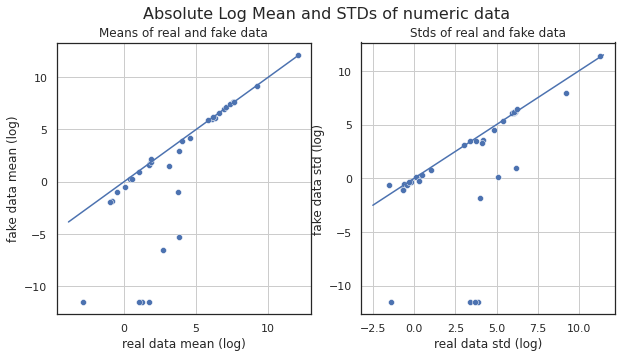

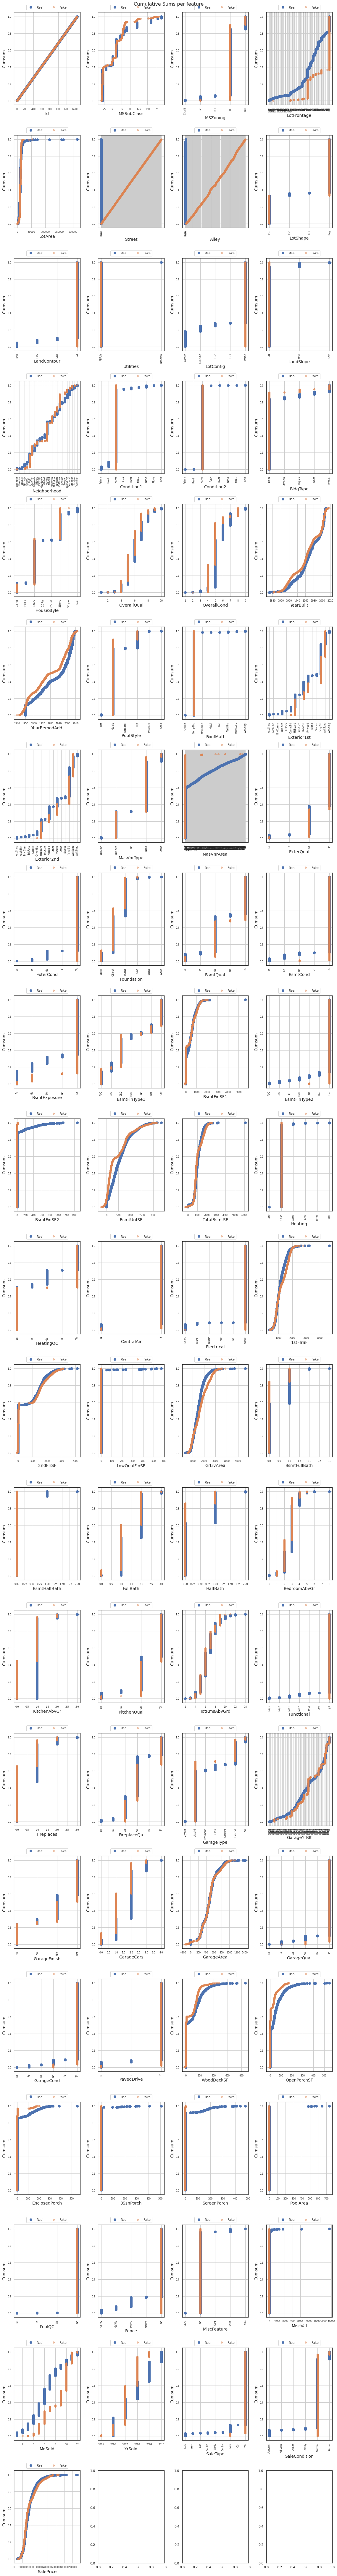

/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ilan/.local/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


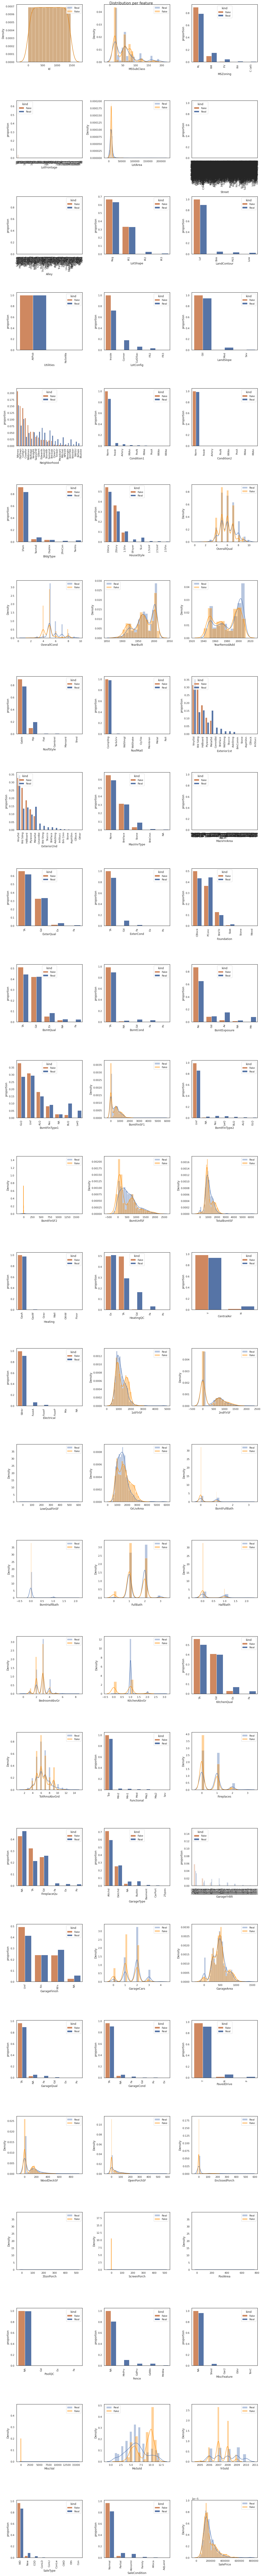

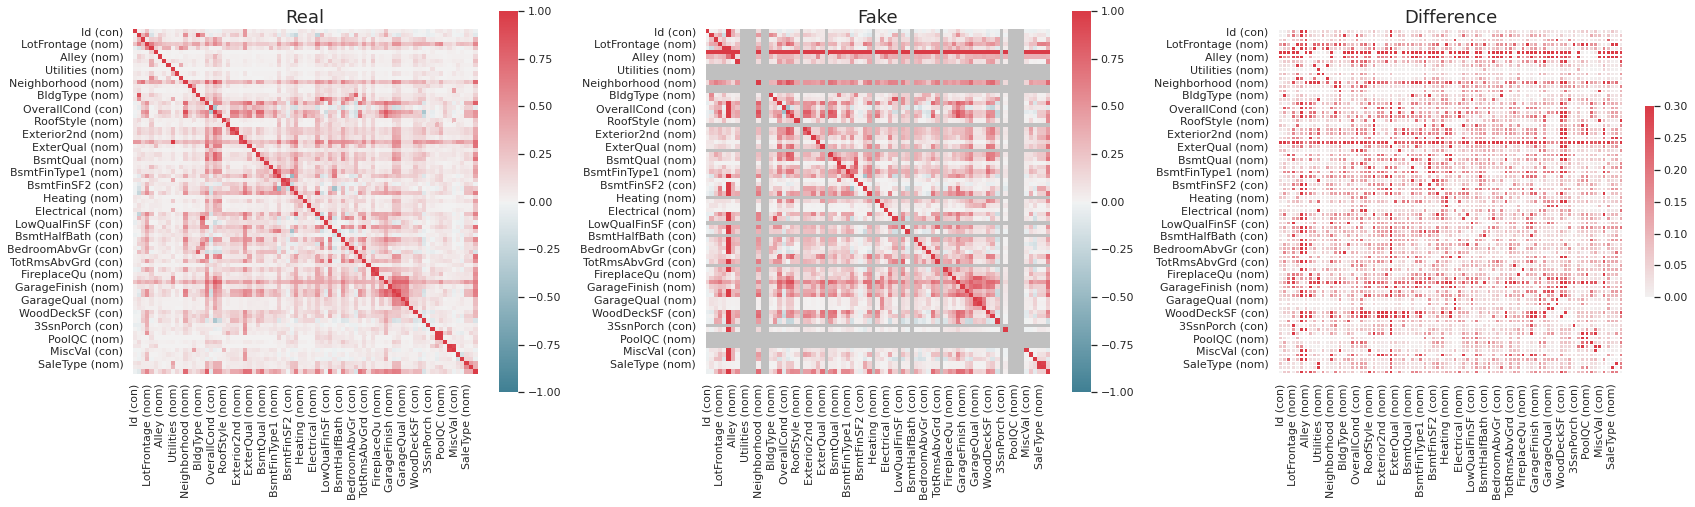

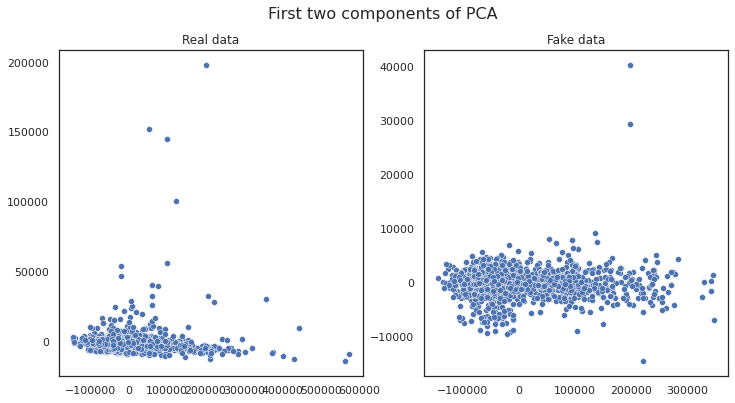

In [22]:
from table_evaluator import load_data, TableEvaluator

print(data.shape, syn_data1.shape)
table_evaluator =  TableEvaluator(data, syn_data1)

table_evaluator.visual_evaluation()

In [23]:
from sdv.evaluation import evaluate

evaluate(syn_data1.drop(['Street','Alley','Id'],axis = 1), data.drop(['Street','Alley','Id'],axis = 1), metrics=['CSTest', 'KSTest'], aggregate=False)

metric                                     name  raw_score  \
0  CSTest                              Chi-Squared   0.993344   
1  KSTest  Inverted Kolmogorov-Smirnov D statistic   0.820588   

   normalized_score  min_value  max_value      goal  
0          0.993344        0.0        1.0  MAXIMIZE  
1          0.820588        0.0        1.0  MAXIMIZE

In [24]:
from sdv.metrics.tabular import MulticlassDecisionTreeClassifier

MulticlassDecisionTreeClassifier.compute(data, syn_data1, target='GarageFinish')

0.6173361322612897

In [25]:
train = data.sample(int(len(data) * 0.75))

test = data[~data.index.isin(train.index)]

MulticlassDecisionTreeClassifier.compute(test, train, target='GarageFinish')

0.7461839757824213

In [26]:
spark.stop()